In [2]:
import cv2 as cv
import numpy as np
from img_utils import *
from window_utils import *
import matplotlib.pyplot as plt

In [3]:
# set the path of dataset
DATASET_PATH = "C:\MY DATA\Code Valley\MATLAB\determining-optical-flow-master\horn-schunck"

In [4]:
def compute_gradients(img_1, img_2):
    """ returns gradients of image I(x,y,t) along x, y, t as tuple """
    I_x = compute_horizontal_gradient(img_1, img_2)
    I_y = compute_vertical_gradient(img_1, img_2)
    I_t = compute_temporal_gradient(img_1, img_2)

    return (I_x, I_y, I_t)

def compute_horizontal_gradient(img_1, img_2):
    """ returns gradient of the image (I_x) along the horizontal direction """
    kernel_x = 0.25 * np.array([[-1, 1], [-1, 1]]).astype('float32')

    d_dx_img_1 = cv.filter2D(img_1.astype('float32'), -1, kernel_x)
    d_dx_img_2 = cv.filter2D(img_2.astype('float32'), -1, kernel_x)
    d_dx_img = d_dx_img_1 + d_dx_img_2
    # d_dx_img = normalize_to_unit_range(d_dx_img)

    return d_dx_img/2

def compute_vertical_gradient(img_1, img_2):
    """ returns gradient of the image (I_y) along the vertical direction """
    kernel_y = 0.25 * np.array([[-1, -1], [1, 1]]).astype('float32')

    d_dy_img_1 = cv.filter2D(img_1.astype('float32'), -1, kernel_y)
    d_dy_img_2 = cv.filter2D(img_2.astype('float32'), -1, kernel_y)
    d_dy_img = d_dy_img_1 + d_dy_img_2
    # d_dy_img = normalize_to_unit_range(d_dy_img)

    return d_dy_img/2

def compute_temporal_gradient(img_1, img_2):
    """ returns temporal gradient between two frames """
    kernel_t = 0.25 * np.array([[1, 1], [1, 1]]).astype('float32')

    d_dt_img_1 = cv.filter2D(img_1.astype('float32'), -1, kernel_t)
    d_dt_img_2 = cv.filter2D(img_2.astype('float32'), -1, kernel_t)
    d_dt_img = d_dt_img_2 - d_dt_img_1
    # d_dt_img = normalize_to_unit_range(d_dt_img)

    return d_dt_img/2

def normalize_to_unit_range(img):
    """ takes in an image and normalizes to range 0.0 to 1.0  """
    return cv.normalize(img.astype('float32'), None, 0.0, 1.0, cv.NORM_MINMAX)


In [5]:
def draw_optical_flow(u, v):
    """ Takes in u and v components of optical flow and draws color encoded image. 
        First an HSV image is built using polar coordinates of the flow.
        
        note:
        OpenCV uses HSV ranges between (0-180, 0-255, 0-255).

        Then, its converted to RGB and displayed.
    """
    # create tensor with all zeros of frame shape
    hsv = np.zeros((*get_image_shape(u), 3), dtype=np.uint8)

    # get polar representation of the optical flow components
    magnitude, angle = cv.cartToPolar(u, v)
    # print(f'mag shape{magnitude.shape} dtype {magnitude.dtype}, angle shape {angle.shape} dtype {angle.dtype}')
    # l_print(f'\nmagnitude')
    # l_print(magnitude)
    # l_print(f'\nangle')
    # l_print(angle)

    # set saturation to maximum
    hsv[..., 1] = 255
    # print(f'hsv shape {hsv.shape}, dtype {hsv.dtype}')

    # set image hue and value
    hsv[..., 0] = angle * 180 / np.pi 
    # print(f'hsv shape {hsv.shape}, dtype {hsv.dtype}, angle max {np.max(hsv[...,0])} min {np.min(hsv[...,0])}')
    hsv[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
    # print(f'hsv shape {hsv.shape}, dtype {hsv.dtype}, mag max {np.max(hsv[...,2])} min {np.min(hsv[...,2])}')
    # l_print('\nPrinting HSV')
    # l_print(hsv)
    # convert HSV to RGB (BGR in opencv)
    color_img = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

    # show flow
    # window_name = 'Optical flow'
    # cv.imwrite('out_img_OF.jpg', color_img)
    # cv.imshow(window_name, color_img)
    # cv.waitKey(0)
    # cv.destroyWindow(window_name) 
    # plt.imshow(color_img)
    return color_img


In [6]:
# get image paths
path_list = get_image_paths(DATASET_PATH)

# read images
img_1 = cv.imread(path_list[1])
img_2 = cv.imread(path_list[2])

# convert to grayscale
img_gray_1 = convert_to_grayscale(img_1)
img_gray_2 = convert_to_grayscale(img_2)

# smooth(blur) both frames
img_blur_1 = cv.GaussianBlur(img_gray_1, (3,3), 0)
img_blur_2 = cv.GaussianBlur(img_gray_2, (3,3), 0)

# normalize (equivalent of im2double in MATLAB)
img_norm_1 = normalize_to_unit_range(img_1)
img_norm_2 = normalize_to_unit_range(img_2)


img_1 shape (20, 20, 3)


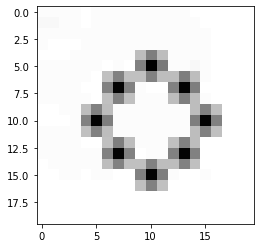

In [7]:
from math import sin, cos
from synth_data import generate_synth_data

# create dummy test images 
height = 20
width = 20
data_path = generate_synth_data(img_size=(height,width), 
                               path='./', 
                               num_images=4, 
                               folder_name='synth_data')
# list out the image path
img_paths = get_image_paths(path=data_path, image_type='jpg')

img_1 = cv.imread(img_paths[0])
img_2 = cv.imread(img_paths[1])

# plt.imshow(img_1,  cmap='gray')
plt.imshow(img_2, cmap='gray')

print(f'img_1 shape {img_1.shape}')
# convert to grayscale
img_gray_1 = convert_to_grayscale(img_1)
img_gray_2 = convert_to_grayscale(img_2)

# apply blurring and normalize
img_blur_1 = cv.GaussianBlur(img_gray_1, (3,3), 0)
img_blur_2 = cv.GaussianBlur(img_gray_2, (3,3), 0)

# normalize (equivalent of im2double in MATLAB)
img_norm_1 = normalize_to_unit_range(img_blur_1)
img_norm_2 = normalize_to_unit_range(img_blur_2)

plt.imshow(img_norm_1, cmap='gray')

In [8]:
# compute gradients along x,y,t
I_x, I_y, I_t = compute_gradients(img_norm_1, img_norm_2)

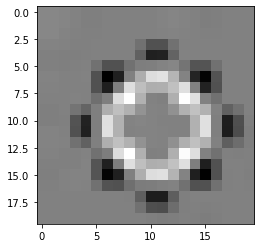

In [9]:
# display the gradients
# plt.imshow('x', I_x)
# plt.imshow('y', I_y)
# plt.imshow('t', I_t)
plt.imshow(I_x)
plt.imshow(I_y)
plt.imshow(I_t, cmap='gray')

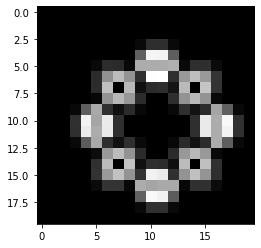

In [21]:
# initialize alpha and number of iterations (higher alpha enforces smoother flow field)
alpha = 0.1
num_iter = 512

# pre-compute smoothness error term
e_smooth = 4*alpha**2 + I_x**2 + I_y**2               # note operations are element-wise
plt.imshow(normalize_to_unit_range(e_smooth), cmap='gray')


In [22]:
# initialize velocity field components u and v with zeros  
u = np.zeros_like(img_norm_1)
v = np.zeros_like(img_norm_1)
laplacian_kernel = get_laplacian_kernel()
avg_ker = get_average_kernel()

In [23]:
# perform iterative solution
for i in range(num_iter):
    # compute average of previous velocity estimates
    u_avg = cv.filter2D(u, -1, avg_ker)
    v_avg = cv.filter2D(v, -1, avg_ker)

    # compute the brightness error term
    e_bright = I_x * u_avg + I_y * v_avg + I_t      # note operations are element-wise

    # compute new velocities from estimated derivatives
    e_quotient = e_bright / e_smooth
    u = u_avg - I_x * e_quotient
    v = v_avg - I_y * e_quotient

    # # normalize u, v
    # u = cv.normalize(u.astype('float32'), None, -0.5, 0.5, cv.NORM_MINMAX) #normalize_to_unit_range(u)
    # v = cv.normalize(v.astype('float32'), None, -0.5, 0.5, cv.NORM_MINMAX) #normalize_to_unit_range(v)

u shape before norm (20, 20) min and max -1.0212442874908447 1.0225517749786377
u shape (20, 20)
hsv initial shape (20, 20, 3)


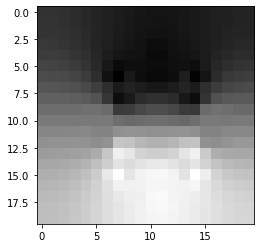

In [24]:
print(f'u shape before norm {u.shape} min and max {np.min(u)} {np.max(u)}')
u = normalize_to_unit_range(u)
v = normalize_to_unit_range(v)
plt.imshow(u, cmap='gray')
plt.imshow(v, cmap='gray')

hsv = np.zeros((*get_image_shape(u), 3), dtype=np.uint8)
print(f'u shape {u.shape}')
print(f'hsv initial shape {hsv.shape}')
magnitude, angle = cv.cartToPolar(u, v)
hsv[..., 1] = 255
hsv[..., 0] = angle * 180 / np.pi 
hsv[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
# print(hsv)

# flow = cv.calcOpticalFlowFarneback(img_norm_1,img_norm_2, None, 0.5, 3, 15, 3, 5, 1.2, 0)
# u = flow[..., 0]
# v = flow[..., 1]
# img = cv.cvtColor(draw_optical_flow(u, v), cv.COLOR_BGR2RGB)
# plt.imshow(np.array(img))
# cv.waitKey(0)
# cv.destroyAllWindows()

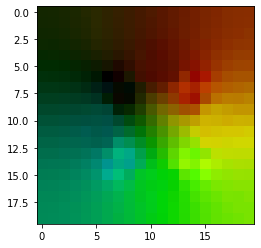

In [25]:
img = cv.cvtColor(draw_optical_flow(u, v), cv.COLOR_BGR2RGB)
plt.imshow(np.array(img))

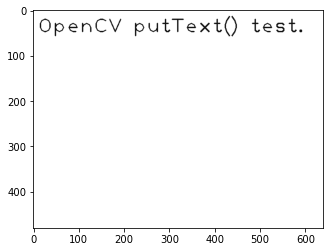

In [15]:
# testing inserting text in images
# create a blank image
img_text = np.ones(shape=(480, 640), dtype=np.uint8) * 255
img_text = cv.putText(img=img_text, text="OpenCV putText() test.", org=(10,50),fontFace=cv.FONT_HERSHEY_PLAIN, fontScale=3, color=(16,16,16), thickness=2, lineType=cv.LINE_8)
img_text = cv.cvtColor(img_text, cv.COLOR_BGR2RGB)
plt.imshow(img_text)

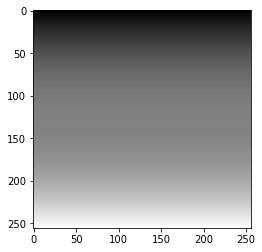

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
from horn_schunk import get_color_scheme

img, u, v = get_color_scheme((128,128))
cv.imwrite('out_img_color_scheme_128.jpg', img)

img, u, v = get_color_scheme((256,256))
cv.imwrite('out_img_color_scheme_256.jpg', img)

plt.imshow(v, cmap='gray')
plt.show()